In [3]:
!pip install rebound

In [4]:
import rebound

In [31]:
sim = rebound.Simulation()

In [36]:
inner = rebound.Simulation()

In [37]:
inner.add(["Sun", "Earth", "Venus", "Mercury", "Mars"])

Searching NASA Horizons for 'Sun'... 
Found: Sun (10) 
Searching NASA Horizons for 'Earth'... 
Found: Earth-Moon Barycenter (3) (chosen from query 'Earth')
Searching NASA Horizons for 'Venus'... 
Found: Venus Barycenter (299) (chosen from query 'Venus')
Searching NASA Horizons for 'Mercury'... 
Found: Mercury Barycenter (199) (chosen from query 'Mercury')
Searching NASA Horizons for 'Mars'... 
Found: Mars Barycenter (4) (chosen from query 'Mars')


In [33]:
sim.add(["Sun", "Earth", "Venus", "Mercury", "Mars", "Jupiter", "Saturn", "Uranus", "Neptune"])

Searching NASA Horizons for 'Sun'... 
Found: Sun (10) 
Searching NASA Horizons for 'Earth'... 
Found: Earth-Moon Barycenter (3) (chosen from query 'Earth')
Searching NASA Horizons for 'Venus'... 
Found: Venus Barycenter (299) (chosen from query 'Venus')
Searching NASA Horizons for 'Mercury'... 
Found: Mercury Barycenter (199) (chosen from query 'Mercury')
Searching NASA Horizons for 'Mars'... 
Found: Mars Barycenter (4) (chosen from query 'Mars')
Searching NASA Horizons for 'Jupiter'... 
Found: Jupiter Barycenter (5) (chosen from query 'Jupiter')
Searching NASA Horizons for 'Saturn'... 
Found: Saturn Barycenter (6) (chosen from query 'Saturn')
Searching NASA Horizons for 'Uranus'... 
Found: Uranus Barycenter (7) (chosen from query 'Uranus')
Searching NASA Horizons for 'Neptune'... 
Found: Neptune Barycenter (8) (chosen from query 'Neptune')


In [42]:
inner.add(m=5e-3,a=1.25)
sim.add(m=5e-3,a=1.25)

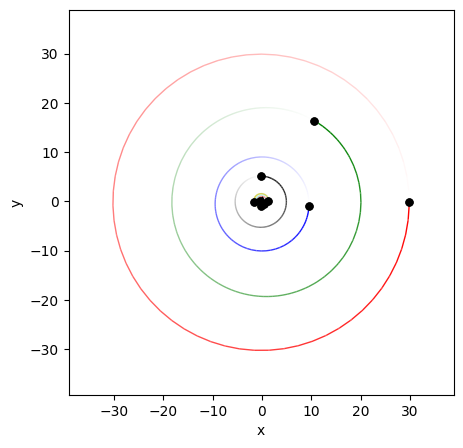

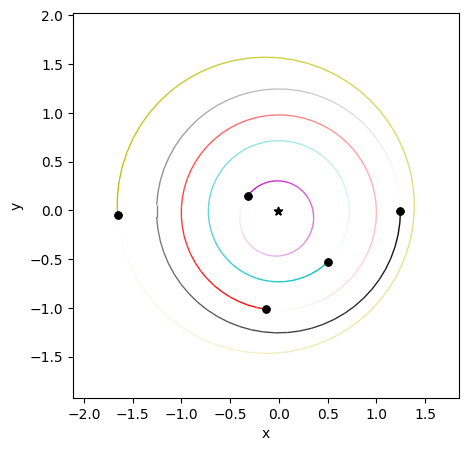

In [40]:
rebound.OrbitPlot(sim, color= True)
rebound.OrbitPlot(inner, color= True)

In [ ]:
!pip install spock
from spock import FeatureClassifier
feature_model = FeatureClassifier()


In [41]:
inner.move_to_com()

print(feature_model.predict_stable(inner))

0.8655907


/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [43]:
sim.move_to_com()

print(feature_model.predict_stable(sim))

0.00442034


/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [47]:
import numpy as np
from spock import DeepRegressor
deep_model = DeepRegressor()

median, lower, upper, samples = deep_model.predict_instability_time(
    sim, samples=10000, return_samples=True, seed=0
)
print(10**np.average(np.log10(samples)))  # Expectation of log-normal
# >>> 414208.4307974086

print(median)
# >>> 223792.38826507595

0.04878652634891519
0.04878652634891519


In [48]:
from spock import CollisionMergerClassifier
class_model = CollisionMergerClassifier()

prob_12, prob_23, prob_13 = class_model.predict_collision_probs(sim)

print(prob_12, prob_23, prob_13)
# >>> 0.2738345 0.49277353 0.23339202

0.11386863 0.004605686 0.8815257
